# Color Masking, Green Screen

### Import resources

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np
import cv2

%matplotlib inline

### Read in and display the image

Image dimensions: (450, 660, 3)


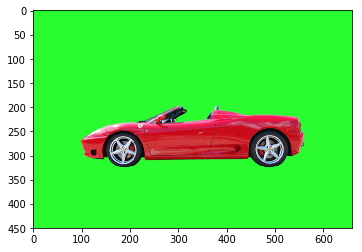

In [88]:
# Read in the image
image = mpimg.imread('images/car_green_screen.jpg')

# Print out the image dimensions (height, width, and depth (color))
print('Image dimensions:', image.shape)

# Display the image
plt.imshow(image)

### Define the color threshold

In [89]:
# Define our color selection boundaries in RGB values
lower_green = np.array([0,180,0]) 
upper_green = np.array([100,255,100])


### Create a mask

 (450, 660)


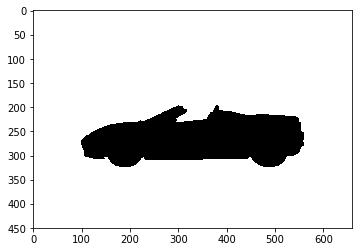

In [90]:
# Define the masked area
mask = cv2.inRange(image, lower_green, upper_green)

# Vizualize the mask
plt.imshow(mask, cmap='gray')
print('', mask.shape)

masked_image (450, 660, 3)


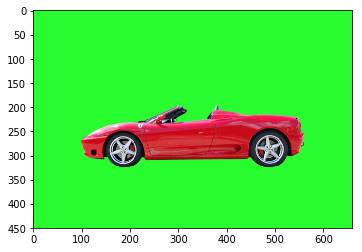

In [100]:
# Mask the image to let the car show through
masked_image = np.copy(image)

masked_image[mask != 0] = [0, 0, 0]

# Display it!
plt.imshow(masked_image)
print('masked_image', masked_image.shape)

## TODO: Mask and add a background image

Image_shape (575, 1024, 3)
Image_shape_crop (450, 660, 3)
mask (450, 660)


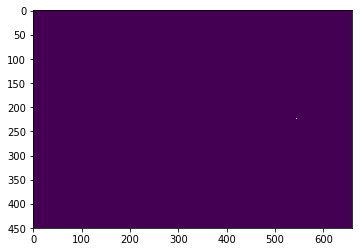

In [108]:
# Load in a background image, and convert it to RGB 
background_image = mpimg.imread('images/sky.jpg')
print('Image_shape', background_image.shape )
#plt.imshow(background_image)

## TODO: Crop it or resize the background to be the right size (450x660)
# Hint: Make sure the dimensions are in the correct order!'

image_crop = np.copy(background_image)

row_crop = 450
col_crop = 660

#image_crop = background_image[row_crop:-row_crop, col_crop:-col_crop, :]

image_crop = background_image[0:450, 0:660, :]
plt.imshow(image_crop)
print('Image_shape_crop', image_crop.shape )


## TODO: Mask the cropped background so that the car area is blocked
# Hint: mask the opposite area of the previous image
lower_green = np.array([180,0,180]) 
upper_green = np.array([255,100,255])

mask = cv2.inRange(image, lower_green, upper_green)

plt.imshow(mask)
print('mask', mask.shape)

#rgba = cv2.cvtColor(rgb_data, cv2.COLOR_RGB2RGBA)

# Then assign the mask to the last channel of the image
#rgba[:, :, 3] = alpha_data
#stand_mask = cv2.resize(mask, (450, 660))

#print('mask_size', stand_mask.shape)



## TODO: Display the background and make sure 
#masked_image = np.copy(image)

#masked_image[mask != 0] = [0, 0, 0]

# Display it!
#plt.imshow(masked_image)


### TODO:  Create a complete image

In [109]:
## TODO: Add the two images together to create a complete image!
# complete_image = masked_image + crop_background

complete_image = cv2.addWeighted(mask, 0.3, image_crop, 0.7, 0) 

plt.imshow(complete_image)


error: /tmp/build/80754af9/opencv_1512491964794/work/modules/core/src/arithm.cpp:659: error: (-209) The operation is neither 'array op array' (where arrays have the same size and the same number of channels), nor 'array op scalar', nor 'scalar op array' in function arithm_op
